# Supermarket Sales Analysis-EDA

## Gerekli kütüphaneleri ve veri setini yükleyelim. 

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

from IPython.display import Image

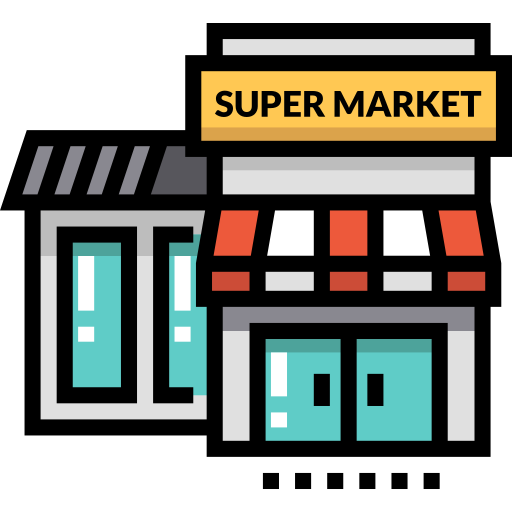

In [3]:
image_path ="C:/Users/Elif/Desktop/supermarket.png"
Image(image_path)

In [24]:
df = pd.read_csv("C:/Users/Elif/Desktop/Global_AI_Proje/supermarket_sales - Sheet1.csv")


## Veri Setini İnceleyelim.

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.shape

(1000, 17)

In [21]:
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [22]:
print(df.dtypes)


Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Day of Week                        object
Hour                                int32
dtype: object


In [8]:
sütun_adları = df.columns.tolist()
print("Sütun Adları:", sütun_adları)

Sütun Adları: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [9]:
# Sadece sayısal sütunları seçerek açıklayıcı istatistikler hesaplayalım.
numerical_columns = df.select_dtypes(include=['float64'])
numerical_description = numerical_columns.describe()
print(numerical_description)

        Unit price       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130    15.379369   322.966749   307.58738   
std      26.494628    11.708825   245.885335   234.17651   
min      10.080000     0.508500    10.678500    10.17000   
25%      32.875000     5.924875   124.422375   118.49750   
50%      55.230000    12.088000   253.848000   241.76000   
75%      77.935000    22.445250   471.350250   448.90500   
max      99.960000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250  

In [25]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [26]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [27]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Veri Seti Hakkında 
Bağlam

Nüfusun yoğun olduğu şehirlerde süpermarketlerin büyümesi artmakta ve pazar rekabeti de yüksek olmaktadır. Veri kümesi, süpermarket şirketinin 3 aylık veriler için 3 farklı şubede kaydedilen geçmiş satışlarından biridir. Kestirimci veri analitiği yöntemlerinin bu veri kümesi ile uygulanması kolaydır.

Öznitelik bilgileri

Fatura kimliği: Bilgisayar tarafından oluşturulan satış fişi fa Şehir Süper merkezlerin konumu

Müşteri tipi: Üye kartı kullanan müşteriler için Üyeler ve üye kartı olmayan müşteriler için Normal tarafından kaydedilen müşteri tipi.

Cinsiyet: Müşterinin cinsiyet tipi

Ürün grubu: Genel ürün kategorizasyon grupları - Elektronik aksesuarlar, Moda aksesuarları, Yiyecek ve içecekler, Sağlık ve güzellik, Ev ve yaşam tarzı, Spor ve seyahat

Birim fiyat: Her bir ürünün $ cinsinden fiyatı

Miktar: Müşteri tarafından satın alınan ürün sayısı

Vergi: Müşteri alımları için %5 vergi ücreti

Toplam: Vergi dahil toplam fiyat

Tarih Satın alma tarihi (Kayıt Ocak 2019'dan Mart 2019'a kadar kullanılabilir)

Zaman: Satın alma zamanı (10am - 9pm)

Ödeme: Müşteri tarafından satın alma için kullanılan ödeme (3 yöntem mevcuttur - Nakit, Kredi kartı ve Ewallet)

COGS: Satılan malların maliyeti

Brüt kar marjı yüzdesi: Brüt kar marjı yüzdesi

Brüt gelir: Brüt gelir

Derecelendirme: Genel alışveriş deneyimlerine ilişkin müşteri katmanlandırma derecelendirmesi (1 ila 10 arasında bir ölçekte)tura kimlik numarası

Şube: Süper merkezin şubesi (A, B ve C ile tanımlanan 3 şube mevcuttur).


## Tek Değişkenli Değişken Analizi

In [30]:
#Kategorik, Sayısal ve Kardinal Verilerin Tespiti:


def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    # Kategorik sütunlar
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    # Kategorik gibi görünen ancak aslında sayısal olan sütunlar
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtype != "O"]
    
    # Kategorik olup da kardinal olan sütunlar
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtype == "O"]
    
    # Kategorik sütunları birleştir
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Sayısal sütunlar
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat



In [31]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'gross margin percentage']

##################### Numeric #####################
['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

##################### Categoric But Cardinal #####################
['Invoice ID', 'Date', 'Time']

##################### Numeric But Categoric #####################
['gross margin percentage']

##################### Columns Overview #####################
Observations: 1000
Variables: 17
cat_cols: 7
num_cols: 7
cat_but_car: 3
num_but_cat: 1


## Zaman Değişkenlerinin İncelenmesi

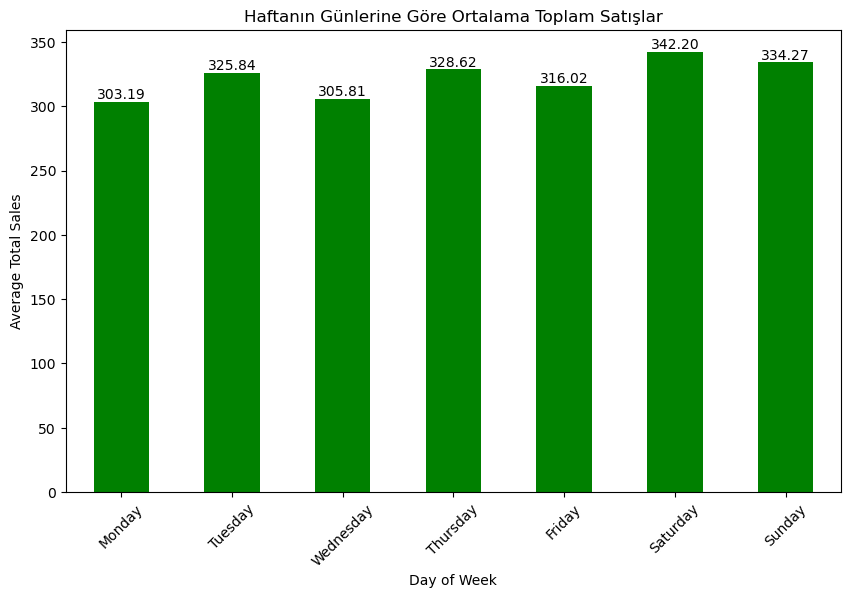

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Tarih sütununu datetime formatına dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Haftanın günlerine göre satış dağılımı (çubuk grafik)
plt.figure(figsize=(10, 6))
sales_by_day = df.groupby('Day of Week')['Total'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sales_by_day.plot(kind='bar', color=['green'])  
plt.xlabel('Day of Week')
plt.ylabel('Average Total Sales')
plt.title('Haftanın Günlerine Göre Ortalama Toplam Satışlar')
plt.xticks(rotation=45)
for i, value in enumerate(sales_by_day):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

# Zaman sütununu datetime formatına dönüştürme
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

plt.show()



## Rapor
Grafiği incelediğimizde en çok satışın Cumartesi, en az satışın ise Pazartesi günü olduğunu görebiliyoruz.
Pazartesi günlerindeki düşük satışlar, hafta sonu tatilinin ardından bir "alışveriş yorgunluğu" veya insanların işe dönme ve haftaya başlama sürecine odaklanması gibi faktörlere bağlanabilir. 
Bu nedenle, Pazartesi günleri genellikle diğer hafta içi günlerine göre biraz daha düşük satışlar görülebilir.
Bu trendler, perakende işletmelerinin pazarlama ve stok yönetimi stratejilerini belirlerken ve iş planlarını oluştururken dikkate alınabilir. Örneğin, hafta sonlarına özel indirimler veya etkinlikler düzenleyerek, hafta sonu satışlarını artırmak mümkün olabilir. Ayrıca, Pazartesi günleri için özel teşvikler veya promosyonlarla satışları artırmak da mümkün olabilir.

## Kategorik Değişkenlerin İncelenmesi

In [13]:
# Cinsiyet dağılımı
print(df['Gender'].value_counts())

# Ürün hattı dağılımı
print(df['Product line'].value_counts())

# Müşteri tipi dağılımı
print(df['Customer type'].value_counts())

# Şube dağılımı
print(df['Branch'].value_counts())

# Şehir dağılımı
print(df['City'].value_counts())

# Ödeme yöntemi dağılımı
print(df['Payment'].value_counts())


Gender
Female    501
Male      499
Name: count, dtype: int64
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64
Branch
A    340
B    332
C    328
Name: count, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


## Kategorik Özelliklerin Dağılımları

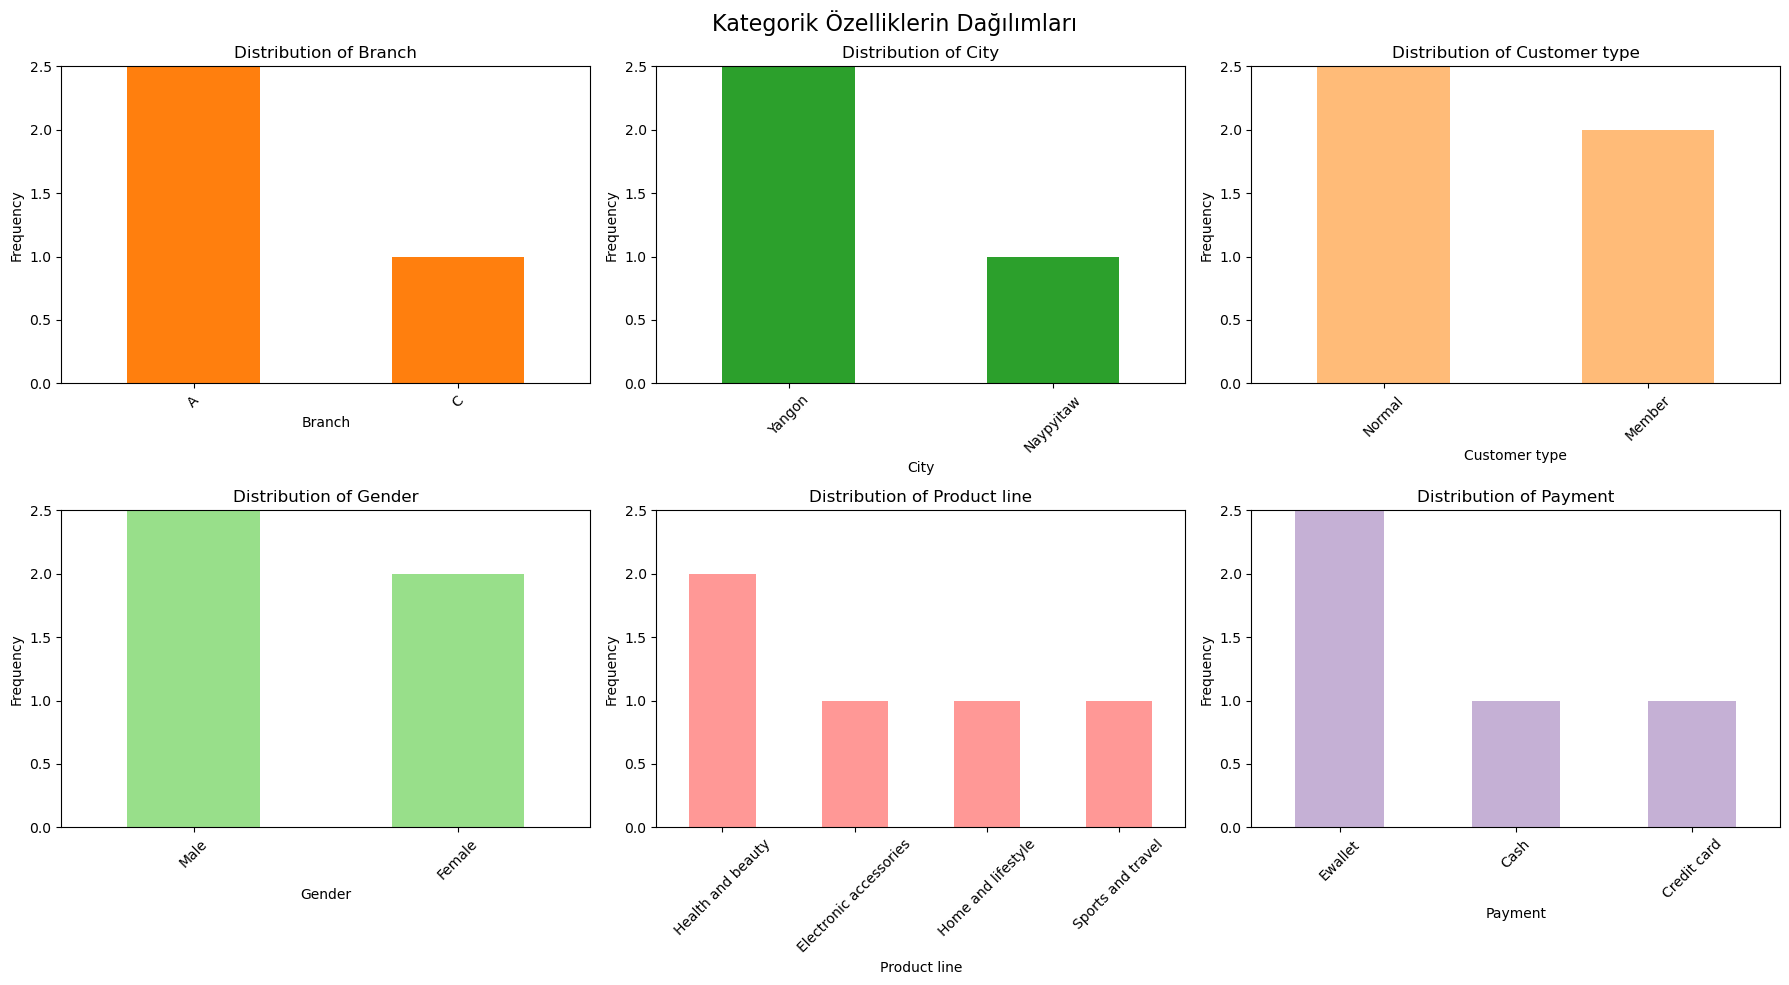

In [12]:
import matplotlib.pyplot as plt

# Kategorik özelliklerin dağılımını inceleyin
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

# Yeşil ve turuncu tonları içeren renk paleti
colors = ['#ff7f0e', '#2ca02c', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

# Grafikleri yan yana çıkararak göstermek için subplotlar oluşturun
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Her bir kategorik özelliğin grafiklerini çizin ve başlık ekleyin
for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    df[feature].value_counts().plot(kind='bar', color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylim(0, df.shape[0] * 0.5)

# Genel başlık ekleyin
plt.suptitle('Kategorik Özelliklerin Dağılımları', fontsize=16)

# Grafikleri düzenleyin ve gösterin
plt.tight_layout()
plt.show()


## Rapor
1-Şubeler Arasındaki Performans Farklılıklarını Azaltmak  için C Şubesi İyileştirme Önerileri:
Öncelikle, çalışanlarımıza düzenli eğitim ve geliştirme fırsatları sunabiliriz. Ayrıca, iş süreçlerini gözden geçirerek daha verimli hale getirebiliriz. Performans değerlendirmeleri ve geri bildirimler de önemli olacak. Motivasyonu artırmak için teşvik programları düşünebiliriz. İletişimi güçlendirmek ve müşteri geri bildirimlerine önem vermek de önceliklerimiz arasında olmalı.Bu adımların uygulanmasıyla şubenin performansında olumlu bir değişim bekliyoruz.


2-Yapılan analizlere göre, müşteriler arasında en popüler ödeme yöntemi e-cüzdanlar (ewallet) olarak belirlenmiştir. 
   
   E-cüzdan Entegrasyonu:İşletmemizin ödeme sistemlerini çeşitlendirerek e-cüzdanları daha fazla öne çıkarmak önemlidir. Farklı e-cüzdan sağlayıcılarıyla entegrasyon sağlayarak müşterilerimize daha fazla seçenek sunabiliriz.
   
   Pazarlama Stratejileri: E-cüzdanları öne çıkaran pazarlama kampanyaları düzenleyerek müşterilerimizin bu ödeme yöntemini benimsemesini teşvik edebiliriz. Örneğin, e-cüzdan kullanımını teşvik eden indirimler veya promosyonlar sunabiliriz.
    
   Mobil Uygulama Geliştirme: Mobil uygulamalar aracılığıyla e-cüzdan ödemelerini kolaylaştırmak müşteri deneyimini iyileştirebilir. Mobil uygulamamızı güncelleyerek e-cüzdan entegrasyonunu optimize etmeliyiz.
   
3-Müşteriler arasında en çok rağbet gören ürün kategorisi sağlık ve güzellik ürünleri olarak belirlendi. Bu durum, müşterilerin sağlık ve güzellik ürünlerine olan ilgisini ve talebini yansıtıyor. Sağlık ve güzellik ürünleri genellikle kişisel bakım ve yaşam tarzı ile ilgili olduğu için, bu kategorideki ürünler müşteriler için öncelikli bir tercih olabilir. Bu bilgi, işletmemizin ürün yelpazesini ve pazarlama stratejilerini bu kategoriye odaklayarak müşteri memnuniyetini artırmamız için önemli bir rehber niteliğinde.

## Fiyatın Miktarı Belirlemedeki Rolü: Regresyon Analizi

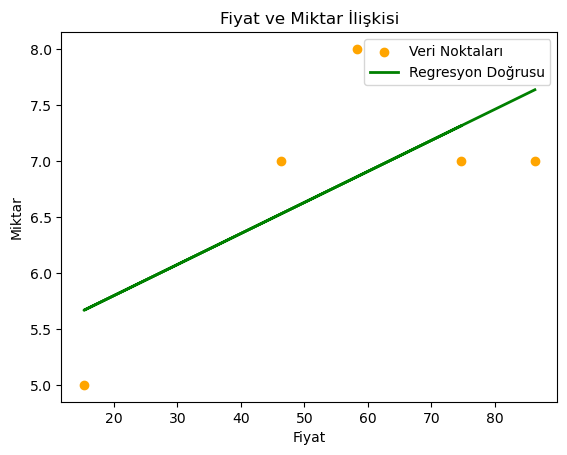

MSE (Mean Squared Error): 0.50
R^2 Score: 0.48


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Veri setini yükleyelim (örnek olarak, df adını kullanalım)
# df isimli DataFrame'inizde 'Unit price' ve 'Quantity' sütunları olduğunu varsayıyoruz
# Eğer gerçek veri setiniz varsa, onu kullanabilirsiniz

# Basit doğrusal regresyon için 'Unit price' ve 'Quantity' sütunlarını kullanalım
X = df[['Unit price']]  # Bağımsız değişken (X)
y = df['Quantity']      # Bağımlı değişken (y)

# Modeli kurup eğitelim
model = LinearRegression()
model.fit(X, y)

# Tahminleri yapalım
y_tahmin = model.predict(X)

# Veriyi ve regresyon doğrusunu görselleştirelim
plt.scatter(X, y, color='orange', label='Veri Noktaları')
plt.plot(X, y_tahmin, color='green', linewidth=2, label='Regresyon Doğrusu')
plt.title('Fiyat ve Miktar İlişkisi')
plt.xlabel('Fiyat')
plt.ylabel('Miktar')
plt.legend()
plt.show()

# Modelin performansını değerlendirelim
mse = mean_squared_error(y, y_tahmin)
r2 = r2_score(y, y_tahmin)
print(f'MSE (Mean Squared Error): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')


## Doğrusal Regresyon Analizi Raporu

Bu analiz, 'Fiyat' ile 'Miktar' arasındaki ilişkiyi incelemek için yapılmıştır. Modelin ne kadar iyi olduğunu belirlemek için iki önemli ölçüt kullanılmıştır.

### Ortalama Kare Hata (MSE):
Modelin gerçek değerlerle tahmin ettiği değerler arasındaki ortalama farkı belirler. Düşük MSE, modelin daha iyi tahminler yaptığını gösterir. Bizim modelimiz için MSE değeri 0.50'dir.

### R^2 Skoru:
Modelin ne kadar iyi açıkladığını gösteren bir ölçüdür. Değer ne kadar yüksekse, model o kadar iyi. Bizim modelimiz için R^2 skoru 0.48'dir, yani modelimiz bağımlı değişkenin %48'ini açıklamaktadır.

#### Sonuçlar
Sonuç olarak, modelimiz 'Miktar'ı tahmin etmede oldukça başarılıdır, ancak hala iyileştirme potansiyeli bulunmaktadır. Bu rapor, modelin performansını anlamak için önemli bir bilgi sunar ve gelecekteki iyileştirmeler için bir temel oluşturur.


## Korelasyon Analizi

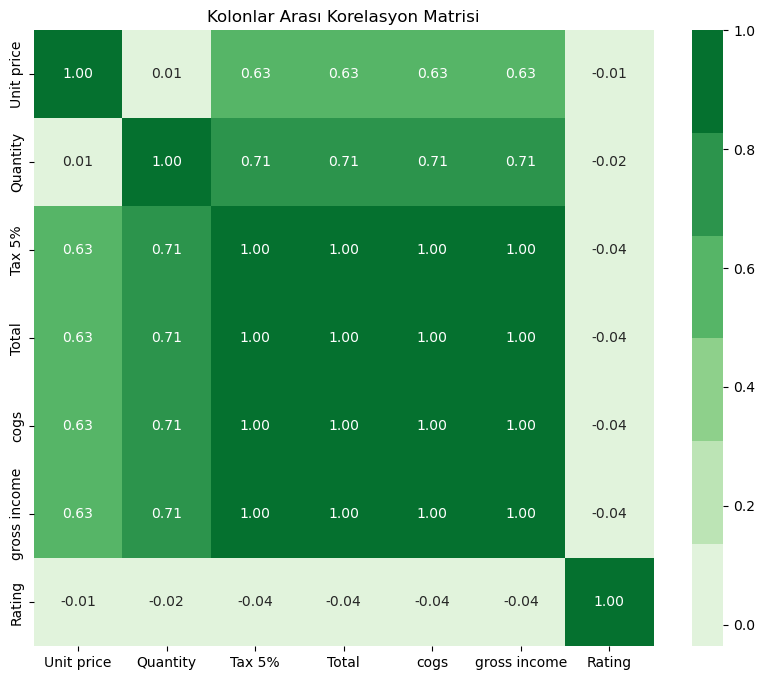

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tüm sayısal sütunları seç
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesapla
correlation_matrix_all = numerical_columns.corr()

# 'gross margin percentage' sütununu çıkar
correlation_matrix_all = correlation_matrix_all.drop('gross margin percentage', axis=0)
correlation_matrix_all = correlation_matrix_all.drop('gross margin percentage', axis=1)

# Renk paletini belirle (Örneğin, Blues paleti)
cmap = sns.color_palette("Greens")

# Korelasyon matrisini görselleştir (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap=cmap, fmt=".2f")
plt.title('Kolonlar Arası Korelasyon Matrisi')
plt.show()



## Unit Price ve Total Arasındaki İlişki

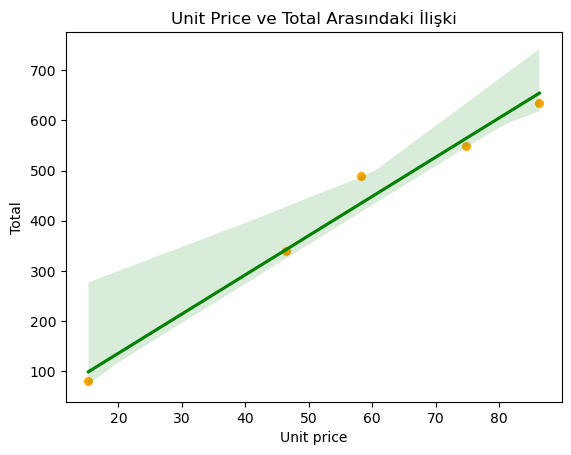

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seçilen sütunları seç
selected_columns = df[['Unit price', 'Total']]

# Nokta grafiğini oluştur
sns.scatterplot(data=selected_columns, x='Unit price', y='Total', color='orange', s=50)  # Nokta boyutu 50
plt.title('Unit Price ve Total Arasındaki İlişki')
plt.xlabel('Unit Price')
plt.ylabel('Total')

# Regresyon doğrusunu ekle
sns.regplot(data=selected_columns, x='Unit price', y='Total', scatter=False, color='green')

plt.show()


## Özellik Mühendisliği(Feature Engineering)

###   Bazı yaygın feature engineering teknikleri şunlardır:
        
    -Tekil Kodlama (One-Hot Encoding): Kategorik değişkenleri nümerik forma dönüştürmek için kullanılır.

    -Etiket Kodlama (Label Encoding): Kategorik değişkenleri sıralı bir nümerik forma dönüştürmek için kullanılır.

    -Bölme/Bölmelendirme (Binning/Bucketing): Sürekli değişkenleri belirli aralıklara bölerek kategorik değişkenlere dönüştürmek için kullanılır.

    -Özellik Ölçekleme (Feature Scaling): Değişkenler arasındaki ölçek farklarını gidermek için kullanılır.

    -Özellik Çıkartma (Feature Extraction): Mevcut değişkenlerden yeni ve daha anlamlı değişkenler türetmek için kullanılır.

    -Etkileşim Özellikleri (Interaction Features): Varolan değişkenler arasındaki etkileşimleri ifade eden yeni değişkenler türetmek için kullanılır.

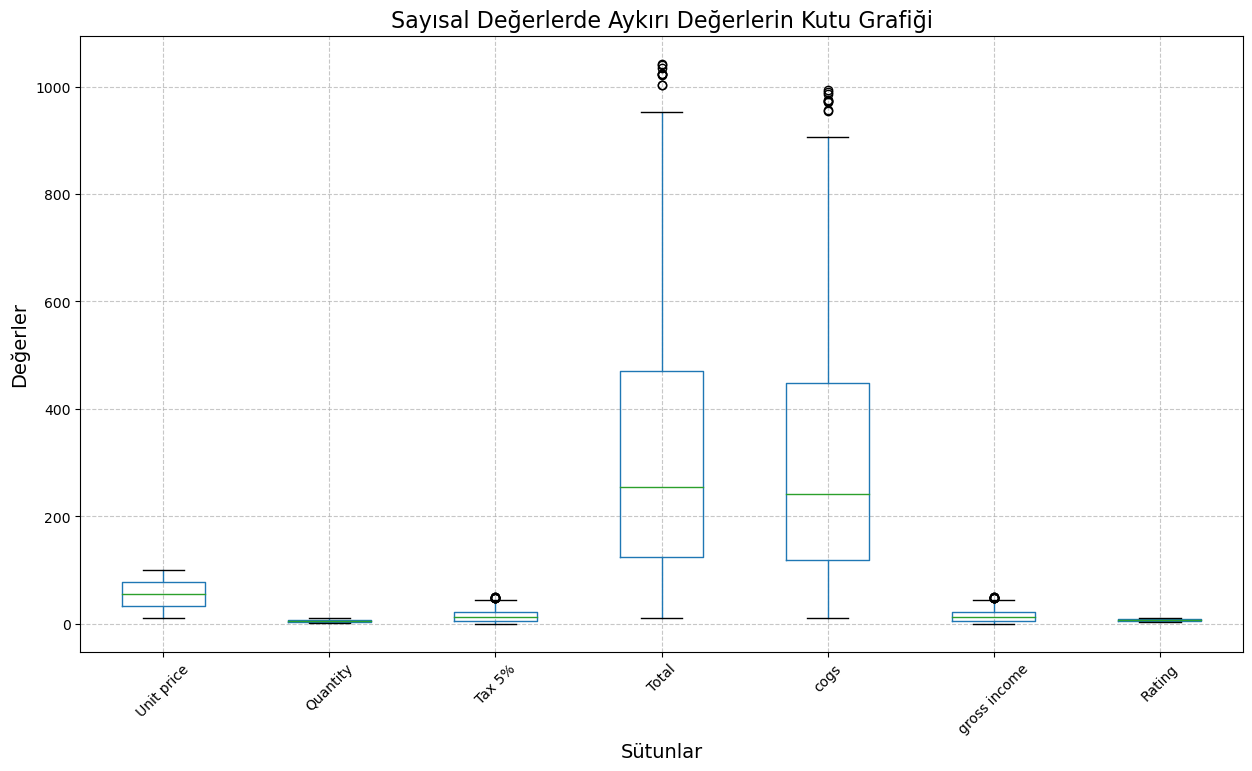

In [38]:
# İlgili sayısal sütunları seç
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

# Aykırı değerleri görselleştir
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot()
plt.title('Sayısal Değerlerde Aykırı Değerlerin Kutu Grafiği', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Sütunlar', fontsize=14)
plt.ylabel('Değerler', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## IQR (Interquartile Range), bir veri setindeki verilerin dağılımının merkezini ve yayılmasını ölçmek için kullanılan önemli bir istatistiksel kavramdır:

    İlk Adım: Verilerin Sıralanması: IQR hesaplaması için ilk adım, veri setinin küçükten büyüğe doğru sıralanmasıdır.

    Çeyreklerin Bulunması: Veri setinin çeyreklerine dayalı olarak IQR hesaplanır. Bu çeyrekler şunlardır:
        Q1: Veri setinin alt %25'lik kısmının (alt çeyrek) ortanca değeri.
        Q2: Veri setinin ortanca değeri (median). Yani, veri setini ikiye böldüğümüzde elde edilen değer.
        Q3: Veri setinin üst %25'lik kısmının (üst çeyrek) ortanca değeri.

    IQR Hesaplanması: IQR, üst çeyrek (Q3) ile alt çeyrek (Q1) arasındaki farktır. Matematiksel olarak ifade edilirse:
    IQR=Q3−Q1IQR=Q3−Q1

    Yorumlama: IQR, veri setinin orta kısmında yer alan verilerin yayılmasını ölçer. IQR ne kadar büyükse, veri noktaları o kadar geniş bir aralıkta dağılmış demektir. Bu nedenle, bir veri setinin IQR değeri büyükse, veri noktalarının yayılımı geniş olabilir ve veri setindeki çeşitlilik veya değişkenlik yüksek olabilir.

In [39]:
# Herhangi bir sütundaki verinin outlier olması için alt ve üst limiti
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [42]:
outlier_thresholds(df,"cogs")

(-377.11375000000004, 944.5162500000001)

In [43]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(
            axis=None):
        return True
    else:
        return False

In [44]:
check_outlier(df,"cogs")

True

### Çözüm Ve Öneriler
"Cogs" (Maliyetler) sütunundaki değerler için alt ve üst sınırlar hesaplandı. Alt sınır -377.11, üst sınır ise 944.52 olarak bulundu. Bu sınırlar, maliyetlerin normal aralığını belirlemek için kullanılabilir.

Alt sınır, maliyetlerin normal aralığının en küçük sınıra kadar olan kısmını belirler. Eğer bir maliyet değeri alt sınırdan daha küçükse, bu maliyet değeri aykırı bir değer olarak kabul edilebilir. Özellikle, negatif maliyetler veya çok düşük maliyetler, işletmenin normal işleyişine uymayabilir ve incelenmesi gerekebilir.

Üst sınır, maliyetlerin normal aralığının en yüksek sınıra kadar olan kısmını belirler. Eğer bir maliyet değeri üst sınırdan daha büyükse, bu maliyet değeri de aykırı bir değer olarak kabul edilebilir. Yüksek maliyetler, işletmenin karlılığını olumsuz etkileyebilir ve maliyetlerin nedenini anlamak ve optimize etmek önemlidir.

Aykırı maliyet değerlerini ele almak için çeşitli çözüm önerileri bulunabilir:
- Negatif maliyetler için: Negatif maliyet değerlerinin nedenini anlamak ve düzeltmek için maliyet kaynaklarını ve hesaplamaları tekrar gözden geçirin.
- Yüksek maliyetler için: Yüksek maliyetlerin nedenini belirlemek için işletme süreçlerini ve maliyet kalemlerini inceleyin. Tedarikçi fiyatlarını, üretim maliyetlerini ve operasyonel verimliliği iyileştirmek için stratejiler geliştirin.
- Aykırı maliyet değerlerini tekrar gözden geçirin ve doğrulayın: Aykırı maliyet değerlerini tekrar kontrol edin ve doğrulayın. Eğer hala geçerliyse, bunların nedenlerini daha derinlemesine inceleyin ve uygun eylemleri alın.